# Titanic - Machine Learning from Disaster

#### Start here! Predict survival on the Titanic and get familiar with ML basics

#### Variable	                   Definition	                                        Key
survival	          Survival	                 0 = No, 1 = Yes
pclass	              Ticket class	             1 = 1st, 2 = 2nd, 3 = 3rd
sex	                  Sex	
Age	                  Age in years	
sibsp	              # of siblings / spouses aboard the Titanic	
parch	              # of parents / children aboard the Titanic	
ticket	              Ticket number	
fare	              Passenger fare	
cabin	              Cabin number	
embarked	          Port of Embarkation	     C = Cherbourg, Q = Queenstown, S = Southampton


#### Train Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')

# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.shape

(891, 12)

In [33]:
pd.set_option('display.max_columns', None)

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
# Use isnull() and sum() to count null values in each column
null_counts = df.isnull().sum()

# Display the results
print(null_counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [54]:
df.shape

(891, 12)

In [90]:
# Drop rows with null values in the specified column
df.dropna(subset=['Embarked'], inplace=True)

In [ ]:
df = df.drop('Cabin', axis=1)

In [59]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [60]:
df.shape

(891, 11)

##### Function for the Hsitogram 

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(data, column_name, bins=20, kde=True):
    """
    Create and display a histogram for a specified column in a Pandas DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        bins (int, optional): The number of bins for the histogram. Default is 20.
        kde (bool, optional): Whether to include a Kernel Density Estimate curve. Default is True.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    sns.histplot(data=data, x=column_name, bins=bins, kde=kde)

    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # Calculate and display mean and median as annotations
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()

    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

    # Add a legend
    plt.legend()

    plt.show()

# Example usage:
# Assuming you have a DataFrame 'df' and want to create a histogram for the 'Age' column
# plot_histogram(df, 'Age', bins=20, kde=True)

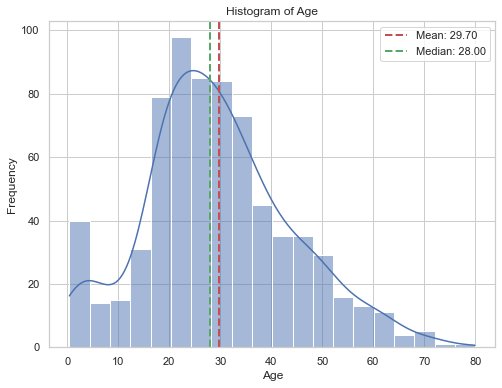

In [75]:
plot_histogram(df, 'Age', bins=20, kde=True)

In [84]:
df['Age'].fillna(df['Age'].median(), inplace=True)

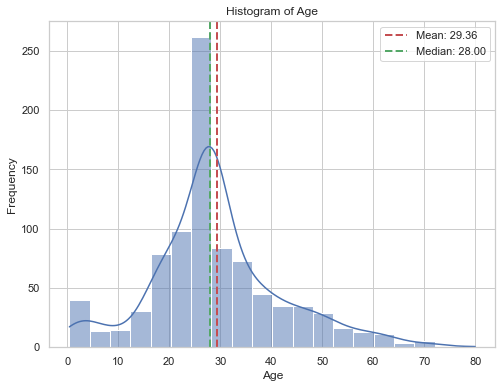

In [85]:
plot_histogram(df, 'Age', bins=20, kde=True)

###### I've imputed the null values of age with the median values

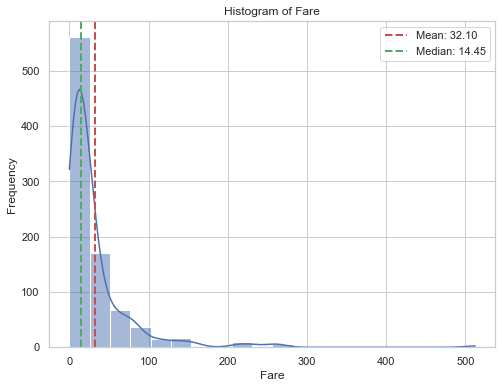

In [93]:
plot_histogram(df, 'Fare', bins=20, kde=True)

In [92]:
# Use isnull() and sum() to count null values in each column
null_counts = df.isnull().sum()

# Display the results
print(null_counts)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [95]:
# Check for duplicate values in the Series
duplicates = df[df.duplicated()]

# Print the duplicate values (if any)
print("Duplicate Values:")
print(duplicates)

Duplicate Values:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [73]:
Men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(Men)/len(Men)*100

print("% of men who survived:", rate_men,"%")

% of men who survived: 18.890814558058924 %


In [69]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived:", rate_women,"%")

% of women who survived: 74.20382165605095 %


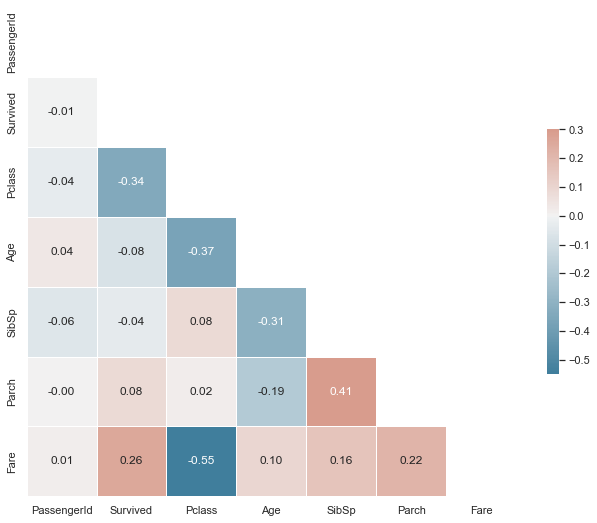

In [78]:
# Compute the correlation matrix
cor = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()


#### Qualitative Analysis

In [34]:
def plot_categorical_ratio(df, categorical_column, save_path=None):
    # Calculate the ratio of each category
    category_ratios = df[categorical_column].value_counts(normalize=True).reset_index()
    category_ratios.columns = [categorical_column, 'Ratio']

    # Sort the DataFrame by ratio (optional)
    category_ratios = category_ratios.sort_values(by='Ratio', ascending=False)

    # Calculate the total count of observations
    total_count = df[categorical_column].count()

    # Set a custom color palette
    custom_palette = sns.color_palette('pastel')

    # Create a bar chart using Seaborn with customizations
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=category_ratios, x=categorical_column, y='Ratio', palette=custom_palette)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    # Display individual counts above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*total_count:.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')

    # Customize the plot
    plt.title(f'Ratios of {categorical_column} (Total Count: {total_count})', fontsize=16)
    plt.xlabel(categorical_column, fontsize=14)
    plt.ylabel('Ratio', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot as an image (optional)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# df = pd.read_csv('your_dataset.csv')

# Plot the categorical ratio for a specific column and save it as an image
# plot_categorical_ratio(df, 'your_categorical_column', save_path='output.png')  # Replace with the actual column name and file path

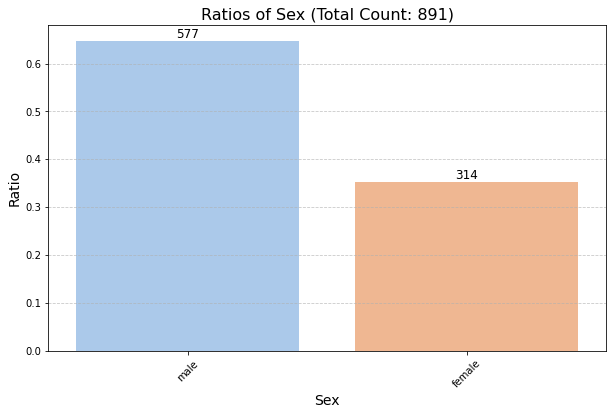

In [35]:
plot_categorical_ratio(df, 'Sex', save_path='Sex.png')

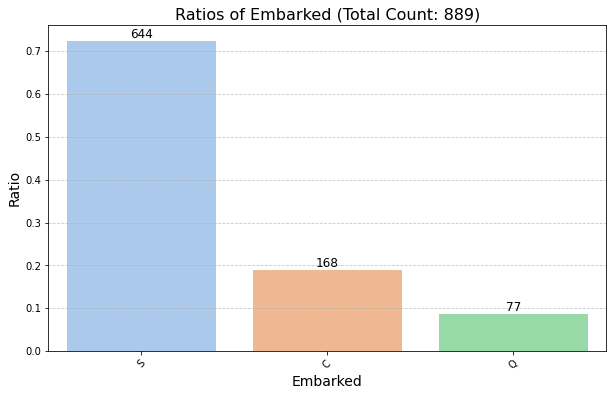

In [36]:
plot_categorical_ratio(df, 'Embarked', save_path='Embarked.png')

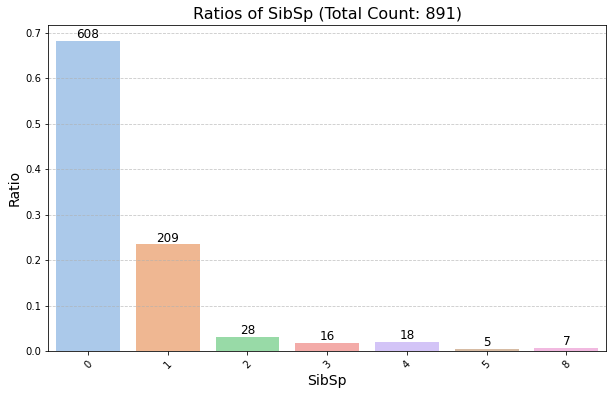

         The Sibsp defines no of siblings / spouses aboard the Titanic         


In [37]:
plot_categorical_ratio(df, 'SibSp', save_path='SibSp.png')

text = "The Sibsp defines no of siblings / spouses aboard the Titanic"
terminal_width = 80  # Adjust this to match your terminal width

# Calculate the number of spaces needed to center the text
padding = (terminal_width - len(text)) // 2

# Create the centered text with spaces on both sides
centered_text = " " * padding + text + " " * padding

# Print the centered text with bold and larger font
print("\033[1;31;40m\033[6;30;47m" + centered_text + "\033[0;37;40m\033[0m")


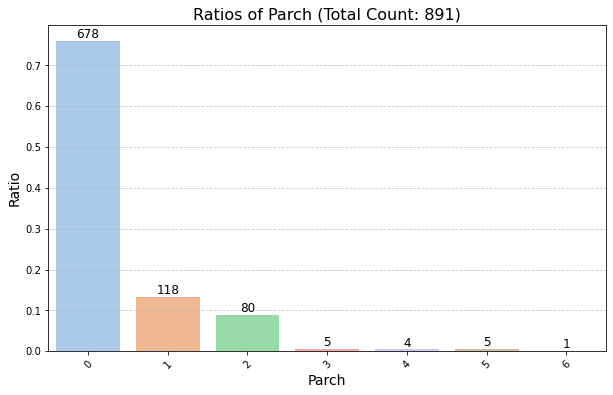

         The PARCH defines no of parents / children aboard the Titanic         


In [38]:
plot_categorical_ratio(df, 'Parch', save_path='Parch.png')
text = "The PARCH defines no of parents / children aboard the Titanic"
terminal_width = 80  # Adjust this to match your terminal width

# Calculate the number of spaces needed to center the text
padding = (terminal_width - len(text)) // 2

# Create the centered text with spaces on both sides
centered_text = " " * padding + text + " " * padding

# Print the centered text with bold and larger font
print("\033[1;31;40m\033[6;30;47m" + centered_text + "\033[0;37;40m\033[0m")


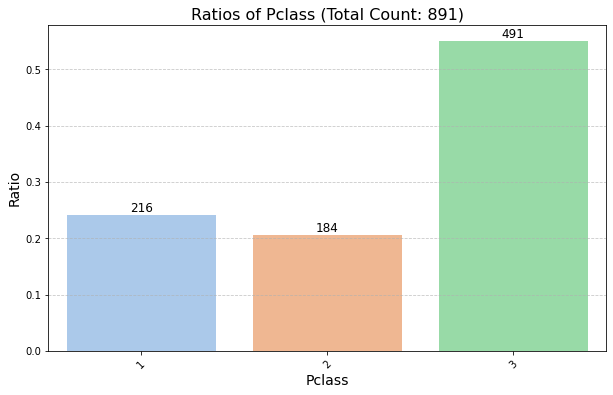

In [39]:
plot_categorical_ratio(df, 'Pclass', save_path='Pclass.png')

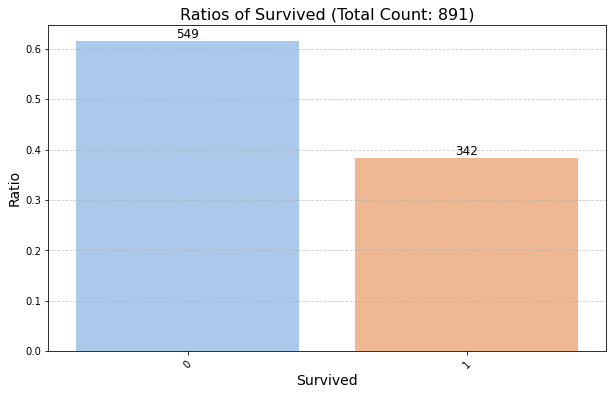

    O defines the no. of people dies and 1 defines the number of people died    


In [40]:
plot_categorical_ratio(df, 'Survived', save_path='Survival.png')

text = "O defines the no. of people dies and 1 defines the number of people died"
terminal_width = 80  # Adjust this to match your terminal width

# Calculate the number of spaces needed to center the text
padding = (terminal_width - len(text)) // 2

# Create the centered text with spaces on both sides
centered_text = " " * padding + text + " " * padding

# Print the centered text with bold and larger font
print("\033[1;31;40m\033[6;30;47m" + centered_text + "\033[0;37;40m\033[0m")

# Machine learning model Implementation

In [104]:
# Read the CSV file into a DataFrame
df2 = pd.read_csv('test.csv')

# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
df2.shape

(418, 11)

In [107]:
df2 = df2.drop('Cabin', axis=1)

In [109]:
df2.shape

(418, 10)

In [110]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [106]:
df.shape

(889, 11)

###### Creating a decision tree

In [101]:
#Import the necessary libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [160]:
df = df.drop('Ticket', axis=1)

In [194]:
df = df.drop('Name', axis=1)

In [ ]:
df = df.drop('PassengerId', axis=1)

In [207]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [208]:
# Here we are doing one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked' ])

In [209]:
df_encoded.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [210]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [211]:
#Split the dataset into features (X) and target labels (y):
X = df_encoded.drop('Survived', axis=1)  # Replace 'target_column' with the actual target column name
y = df_encoded['Survived']

In [212]:
#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
#Create and fit a Decision Tree classifier:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [214]:
#Make predictions on the test set:
y_pred = clf.predict(X_test)

In [215]:
#Evaluate the model's performance:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7415730337078652
Precision: 0.6455696202531646
Recall: 0.7391304347826086
F1 Score: 0.6891891891891891


##### In summary my model classifies 74% of the data correctly

In [216]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [217]:
df2.shape

(417, 9)

In [218]:
# Use isnull() and sum() to count null values in each column
null_counts = df2.isnull().sum()

# Display the results
print(null_counts)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [174]:
# Drop rows with null values in the specified column
df2.dropna(subset=['Fare'], inplace=True)

In [185]:
df2 = df2.drop('Ticket', axis=1)

In [219]:
df2 = df2.drop('Name', axis=1)

In [220]:
df2 = df2.drop('PassengerId', axis=1)

In [221]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [222]:
df.shape

(889, 8)

In [223]:
df2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [224]:
df2.shape

(417, 7)

In [225]:
# Use isnull() and sum() to count null values in each column
null_counts = df2.isnull().sum()

# Display the results
print(null_counts)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [226]:
# Here we are doing one-hot encoding
df2_encoded = pd.get_dummies(df2, columns=['Sex','Embarked' ])

In [227]:
predictions = clf.predict(df2_encoded)

In [230]:
#Add Predictions to df2 as a New Column
df2['Survived'] = predictions

In [231]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [233]:
df2.shape

(417, 8)

### Analysis of my predicted data

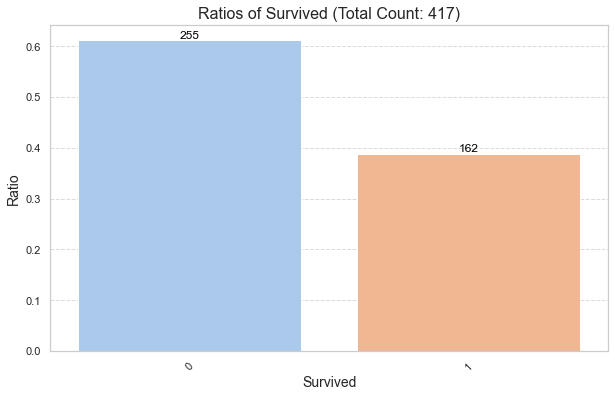

In [232]:
plot_categorical_ratio(df2, 'Survived', save_path='predictSurvival.png')

In [239]:
Men = df2.loc[df2.Sex == 'male']["Survived"]
rate_men = sum(Men)/len(Men)*100

print("% of men who survived:", rate_men,"%")

% of men who survived: 18.11320754716981 %


In [241]:
women = df2.loc[df2.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women who survived:", rate_women,"%")

% of women who survived: 75.0 %


In [252]:
Men = df2.loc[df2.Sex == 'male']["Survived"]
Men_survived = sum(Men)
total_males = (df2['Sex'] == 'male').sum()
Men_died = total_males - Men_survived

print(Men_survived)
print(Men_died)

48
217


In [257]:
women = df2.loc[df2.Sex == 'female']["Survived"]
Women_survived = sum(women)
total_females = (df2['Sex'] == 'female').sum()
Women_died = total_females - Women_survived

print(Women_survived)
print(Women_died)

114
38


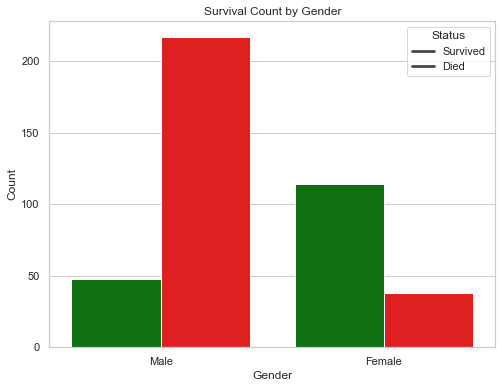

In [260]:
# Create a DataFrame for plotting
data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Survived': [Men_survived, Women_survived],
    'Died': [Men_died, Women_died]
})

# Melt the DataFrame to long format for Seaborn
data = data.melt(id_vars='Gender', var_name='Status', value_name='Count')

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(data=data, x='Gender', y='Count', hue='Status', palette=['green', 'red'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title='Status', loc='upper right', labels=['Survived', 'Died'])
plt.show()